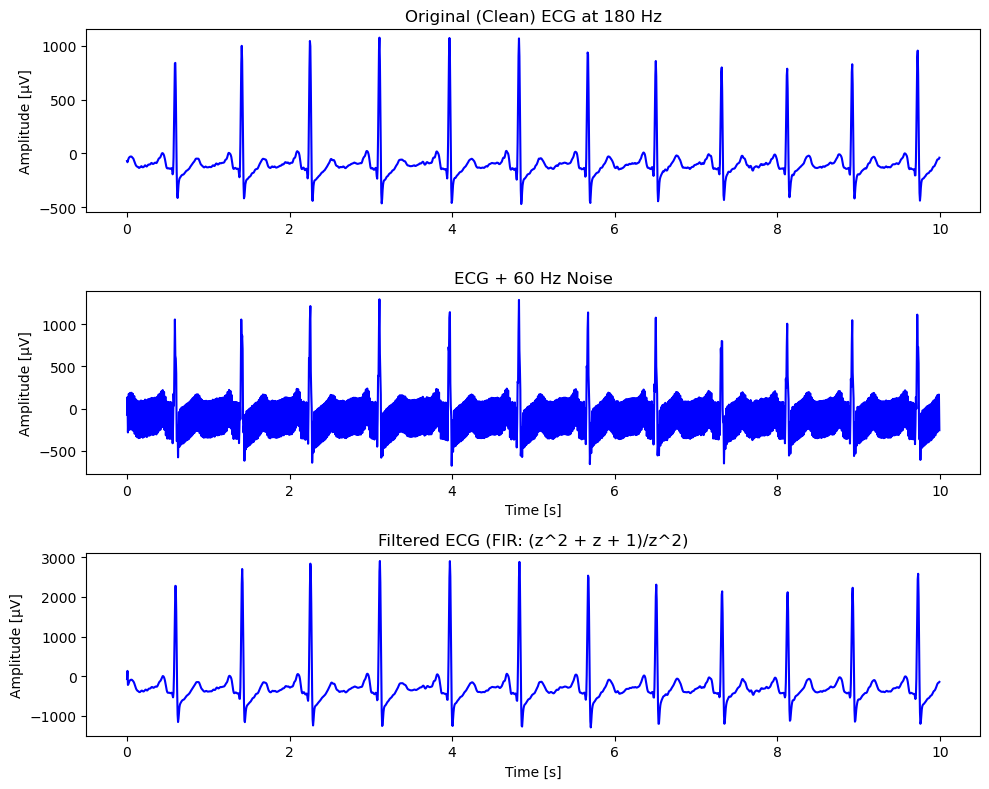

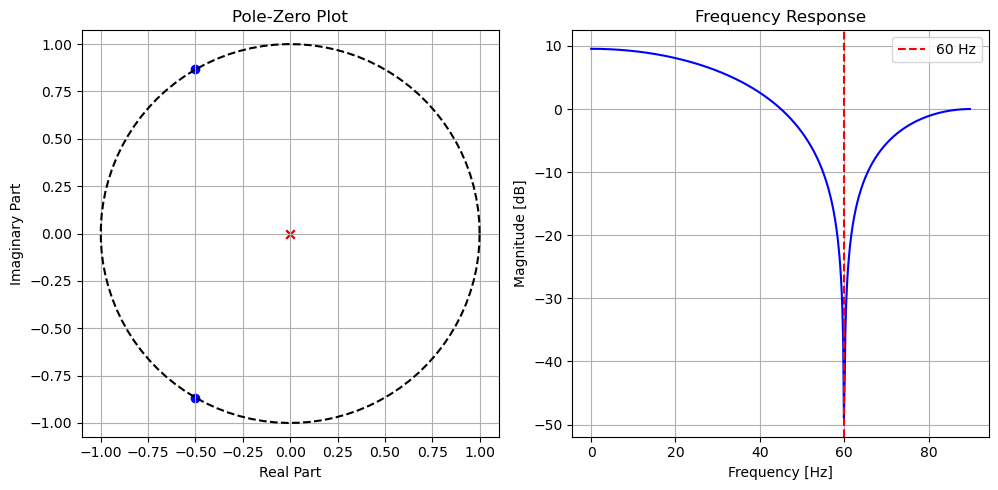

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.signal import resample, freqz, tf2zpk

data_180hz = loadmat('ECG_180hz.mat')
s_n = data_180hz['ecg_180hz'].flatten()

fs = 180

N = len(s_n)
Ts = 1/fs
t = np.arange(0, N*Ts, Ts)

plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.plot(t, s_n, 'b')
plt.title('Original (Clean) ECG at 180 Hz')
plt.ylabel('Amplitude [μV]')

A0 = 250
fd = 60
d_n = A0 * np.sin(2 * np.pi * fd * t)
x_n = s_n + d_n

plt.subplot(3, 1, 2)
plt.plot(t, x_n, 'b')
plt.title('ECG + 60 Hz Noise')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [μV]')

# Causal FIR filter: H(z) = (z^2 + z + 1)/z^2 = 1 + z^-1 + z^-2
b = [1, 1, 1]
a = [1, 0, 0]
y_n = np.zeros(N)
y_n[:2] = x_n[:2]
for n in range(2, N):
    y_n[n] = b[0]*x_n[n] + b[1]*x_n[n-1] + b[2]*x_n[n-2]
ecgFilt1 = y_n

plt.subplot(3, 1, 3)
plt.plot(t, ecgFilt1, 'b')
plt.title('Filtered ECG (FIR: (z^2 + z + 1)/z^2)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [μV]')

plt.tight_layout()

# Pole-zero plot and frequency response
b = [1, 1, 1]  # Numerator coefficients of H(z) =  z^2 + z^1 + 1
a = [1, 0, 0]        # Denominator (FIR filter)

# Compute zeros, poles, and gain
z, p, k = tf2zpk(b, a)

# Pole-zero plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(np.real(z), np.imag(z), marker='o', color='b', label='Zeros')
plt.scatter(np.real(p), np.imag(p), marker='x', color='r', label='Poles')
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta), 'k--')  # Unit circle
plt.grid(True)
plt.axis('equal')
plt.title('Pole-Zero Plot')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')

# Frequency response
w, h = freqz(b, a, worN=512, fs=fs)
plt.subplot(1, 2, 2)
plt.plot(w, 20 * np.log10(np.abs(h)), 'b')
#plt.plot(w, np.abs(h), 'b')
plt.title('Frequency Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.axvline(60, color='r', linestyle='--', label='60 Hz')
plt.legend()

plt.tight_layout()
plt.show()
